
<br>
#Assumptions for the Linear regression problems<br>
1. No multicolinearity<br>
2. Data is normally distributed<br>
3. Check for outliers<br>
4. Linear relationship<br>
5. error terms are normally distributed<br>
6. homoscedasticity. <br>


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics

In [10]:
cp = pd.read_csv("car_price.csv")

In [11]:
cp.shape

(205, 26)

In [12]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null float64
wheel_base           205 non-null object
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

In [13]:
cp.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [14]:
cp[cp==0].count()

symboling            67
normalized_losses     0
make                  0
fuel_type             0
aspiration            0
num_of_doors          0
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  0
stroke                0
compression_ratio     0
horsepower            0
peak_rpm              0
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [15]:
cp[cp=='?'].count()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            2
num_of_doors          0
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [16]:
cp.describe()

,symboling,engine_location,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Fix the ? and zeros

In [17]:
cp.replace({'normalized_losses':{'?':np.NaN}},inplace=True)
cp['normalized_losses'].unique()
cp['normalized_losses'].value_counts()
cp['normalized_losses'].fillna(cp['normalized_losses'].value_counts().index[0], inplace=True)

In [18]:
cp.replace({'aspiration':{'?':np.NaN}},inplace=True)    
cp['aspiration'].unique()
cp['aspiration'].value_counts()
cp['aspiration'] = cp['aspiration'].fillna('four')

In [19]:
cp.replace({'bore':{'?':np.NaN}},inplace=True)  
cp['bore'].unique()
cp['bore'].value_counts()
cp['bore'].fillna(cp['bore'].value_counts().index[0],inplace=True)

In [20]:
cp.replace({'stroke':{'?':np.NaN}},inplace=True)    
cp['stroke'].unique()
cp['stroke'].value_counts()
cp['stroke'].fillna(cp['stroke'].value_counts().index[0],inplace=True)

In [21]:
cp.replace({'horsepower':{'?':np.NaN}},inplace=True)    
cp['horsepower'].unique()
cp['horsepower'].value_counts()
cp['horsepower'].fillna(cp['horsepower'].value_counts().index[0],inplace=True)

In [22]:
cp.replace({'peak_rpm':{'?':np.NaN}},inplace=True)  
cp['peak_rpm'].unique()
cp['peak_rpm'].value_counts()
cp['peak_rpm'].fillna(cp['peak_rpm'].value_counts().index[0],inplace=True)

Here target variable is categorical means it has dtype as object this converts target into float and ignore the ? values and then convert them into NaN

In [23]:
cp['price'] = pd.to_numeric(cp['price'],errors='coerce')
#Remove rows which are null in target variable
cp = cp.dropna(subset=['price']).reset_index(drop=True)

categorise data into numeric and categorical column so that we can convert categorical column into the numeric column easily if data is stored in two different variable 

In [24]:
cp_cat = cp.select_dtypes(include="object")
cp_num = cp.select_dtypes(exclude="object")
cp_cat.info()
cp_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 15 columns):
normalized_losses    201 non-null object
make                 201 non-null object
fuel_type            201 non-null object
aspiration           201 non-null object
num_of_doors         201 non-null object
body_style           201 non-null object
drive_wheels         201 non-null object
wheel_base           201 non-null object
engine_type          201 non-null object
num_of_cylinders     201 non-null object
fuel_system          201 non-null object
bore                 201 non-null object
stroke               201 non-null object
horsepower           201 non-null object
peak_rpm             201 non-null object
dtypes: object(15)
memory usage: 23.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 11 columns):
symboling            201 non-null int64
engine_location      201 non-null float64
length               201 non-null float64
width    

heck correlation of numericals columns

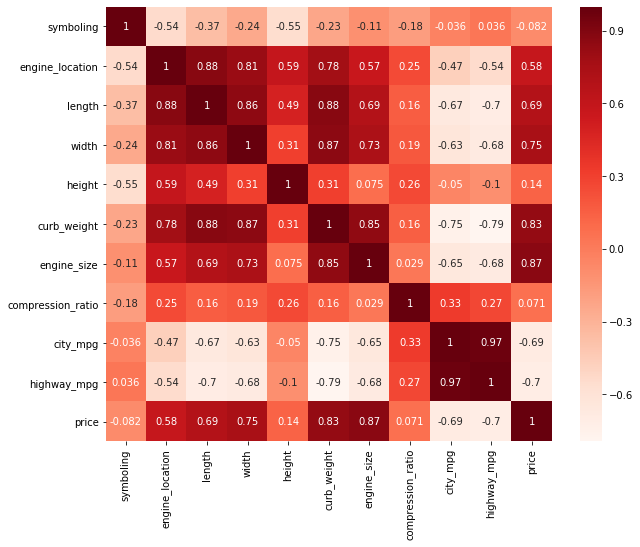

In [26]:
plt.figure(figsize=(10,8))
cor = cp_num.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

normal distribution check

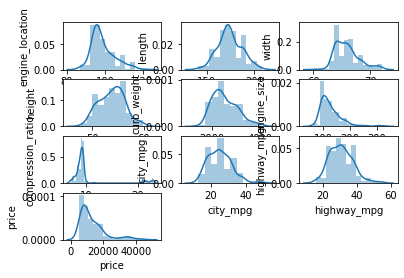

In [27]:
row=4; col=3; pos=1
fig = plt.figure()
for j in cp_num.iloc[:,1:len(cp_num.columns)]:
    fig.add_subplot(row,col,pos)
    sns.distplot(cp_num[j]).set_ylabel(j)
    pos+=1

transformation to make it normal distribution

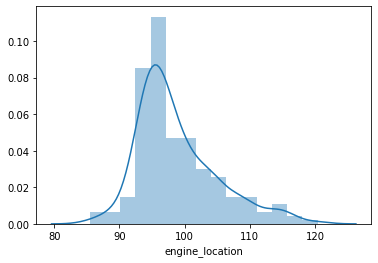

In [28]:
cp['engine_location'] = np.random.normal(cp['engine_location'])
sns.distplot(cp['engine_location'])

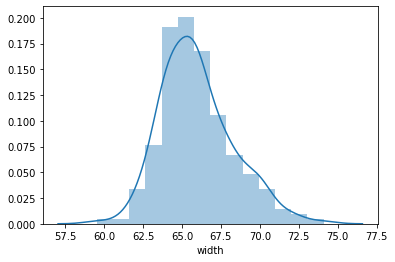

In [29]:
cp['width'] = np.random.normal(cp['width'])
sns.distplot(cp['width'])

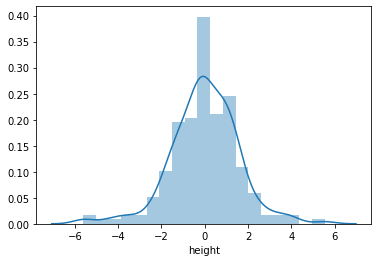

In [30]:
cp['height'] = np.random.normal(np.gradient(cp['height']))
sns.distplot(cp['height'])

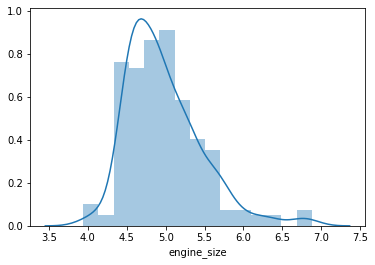

In [31]:
cp['engine_size'] = np.cbrt(cp['engine_size'])
sns.distplot(cp['engine_size'])

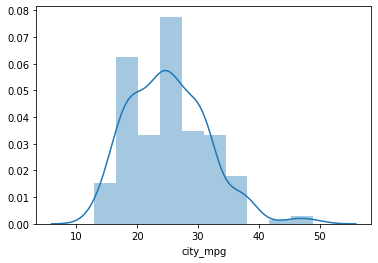

In [32]:
cp['city_mpg'] = np.random.normal(cp['city_mpg'],.1)
sns.distplot(cp['city_mpg'])

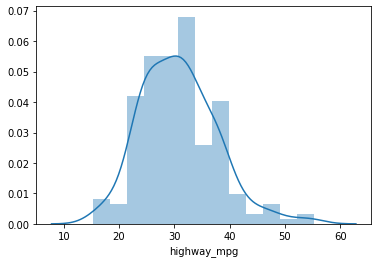

In [33]:
cp['highway_mpg']= np.random.normal(cp['highway_mpg'])
sns.distplot(cp['highway_mpg'])

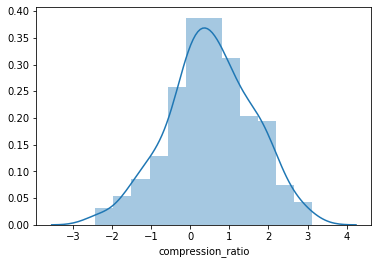

In [34]:
cp['compression_ratio']= np.random.normal(np.sin(cp['compression_ratio']))
sns.distplot(cp['compression_ratio'])

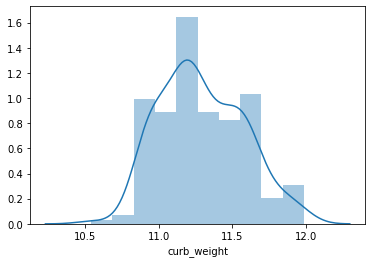

In [35]:
cp['curb_weight']= np.power(np.log2(cp['curb_weight']),1)
sns.distplot(cp['curb_weight'])

gain defined cp_num because changes made to cp should be reflected

In [36]:
cp_num = cp.select_dtypes(exclude="object")

Check normal distribution after transformation

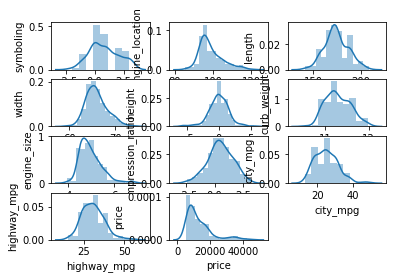

In [37]:
row=4; col=3; pos=1
fig = plt.figure()
for q in cp_num:
    fig.add_subplot(row,col,pos)
    sns.distplot(cp_num[q]).set_ylabel(q)
    pos+=1

Check outiers

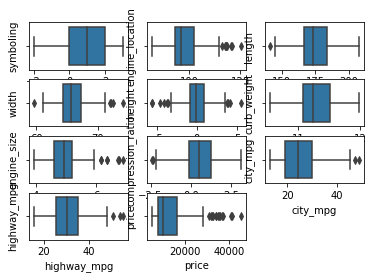

In [38]:
row=4; col=3; pos=1
#sns.set(font_scale=1,color_codes=True)
fig = plt.figure()
for i in cp_num:
    fig.add_subplot(row,col,pos)
    sns.boxplot(cp_num[i]).set_ylabel(i)
    pos = pos+1

In [39]:
#From skewness we came to know that outliers; ideal value is -1 to 1
skew_val = []
for k in cp_num:
    skweness = cp_num[k].skew()
    skew_val.append(skweness)
print(skew_val)
cp_num.columns

[0.19737036029756264, 1.0512239748911945, 0.15444635183586677, 0.6170679501507106, -0.2640640015006342, 0.28452211880447775, 1.2045457631973844, -0.13372615156994772, 0.6761360906163669, 0.6189163976451589, 1.8096753390980749]


Index(['symboling', 'engine_location', 'length', 'width', 'height',
       'curb_weight', 'engine_size', 'compression_ratio', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

Fixing outliers with appropriate values

In [42]:
print(cp['engine_size'].quantile(0.50))
print(cp['engine_size'].quantile(0.95)) 
cp['engine_size'] = np.where(cp['engine_size'] > 5.78, 5.20, cp['engine_size'])
cp['engine_size'].describe()

4.932424148660941
5.788960372062403


count    201.000000
mean       4.911231
std        0.362068
min        3.936497
25%        4.610436
50%        4.932424
75%        5.200000
max        5.677411
Name: engine_size, dtype: float64

In [43]:
print(cp['engine_location'].quantile(0.50))
print(cp['engine_location'].quantile(0.95)) 
cp['engine_location'] = np.where(cp['engine_location'] > 111.4, 101.6, cp['engine_location'])
cp['engine_location'].describe()

96.9798215614587
111.2744718364313


count    201.000000
mean      98.114344
std        4.903465
min       85.477331
25%       94.604469
50%       96.979822
75%      101.600000
max      111.274472
Name: engine_location, dtype: float64

In [44]:
print(cp['length'].quantile(0.02))
print(cp['length'].quantile(0.50)) 
cp['length'] = np.where(cp['length'] < 150, 166.8, cp['length'])
cp['length'].describe()

150.0
173.2


count    201.000000
mean     174.549751
std       11.759881
min      150.000000
25%      166.800000
50%      173.200000
75%      183.500000
max      208.100000
Name: length, dtype: float64

In [45]:
print(cp['width'].quantile(0.99))
print(cp['width'].quantile(0.50)) 
#cp['width'] = np.where(cp['width'] < 62.14, 64.10, cp['width'])
cp['width'] = np.where(cp['width'] > 70.86, 66.96, cp['width'])
cp['width'] = np.where(cp['width'] < 61.84, 64.26, cp['width'])
cp['width'].describe()

72.07873410662928
65.63406157736071


count    201.000000
mean      65.803757
std        2.056513
min       59.541255
25%       64.262424
50%       65.634062
75%       66.960000
max       70.433349
Name: width, dtype: float64

In [46]:
print(cp['compression_ratio'].quantile(0.02))
print(cp['compression_ratio'].quantile(0.50)) 
cp['compression_ratio'] = np.where(cp['compression_ratio'] < -2.24, -0.36, cp['compression_ratio'])
cp['compression_ratio'].describe()

-1.7088547875618174
0.5117638802137898


count    201.000000
mean       0.533273
std        1.044876
min       -2.186538
25%       -0.136168
50%        0.511764
75%        1.231448
max        3.121763
Name: compression_ratio, dtype: float64

In [47]:
print(cp['highway_mpg'].quantile(0.97))
print(cp['highway_mpg'].quantile(0.50)) 
cp['highway_mpg'] = np.where(cp['highway_mpg'] > 45.48, 35.19, cp['highway_mpg'])
cp['highway_mpg'].describe()

46.29436301352555
30.30005832703602


count    201.000000
mean      30.301025
std        5.893110
min       15.346011
25%       25.500256
50%       30.300058
75%       35.026982
max       44.918039
Name: highway_mpg, dtype: float64

In [48]:
print(cp['city_mpg'].quantile(0.99))
print(cp['city_mpg'].quantile(0.50)) 
cp['city_mpg'] = np.where(cp['city_mpg'] > 44.88, 29.96, cp['city_mpg'])
cp['city_mpg'].describe()

45.1157636655168
24.11115982269779


"\nprint(cp['height'].quantile(0.02))\nprint(cp['height'].quantile(0.50)) \ncp['height'] = np.where(cp['height'] > 4.75, 1.22, cp['height'])\ncp['height'] = np.where(cp['height'] < -3.52, -1.00, cp['height'])\ncp['height'].describe()\n"

Again defined cp_num because changes made to cp should be reflected to the cp_num

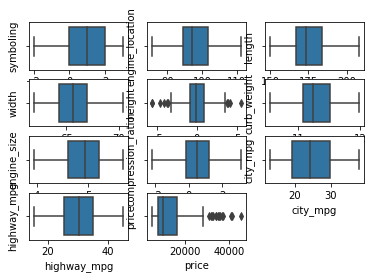

In [66]:
cp_num = cp.select_dtypes(exclude="object")
row=4; col=3; pos=1
#sns.set(font_scale=1,color_codes=True)
fig = plt.figure()
for t in cp_num:
    fig.add_subplot(row,col,pos)
    sns.boxplot(cp_num[t]).set_ylabel(t)
    pos = pos+1

We have ignored the height feature because as we can see the data is distributed on both sides of the whisker. We can say those are not true outliers

Check again for skewness to decide whether outliers fixed; ideal value is -1 to 1

In [65]:
fixed_skew_val = []
for u in cp_num:
    new_skweness = cp_num[u].skew()
    fixed_skew_val.append(new_skweness)
print(fixed_skew_val)

[0.19737036029756264, 0.5238195276772929, 0.3577176784288239, 0.4171456242800351, -0.2640640015006342, 0.28452211880447775, 0.23243582316088077, 0.00572414386970994, 0.23395103768895467, -0.02216869762138233, 1.8096753390980749]


Convert categorical values into numerical values

In [70]:
cp['normalized_losses'] = pd.to_numeric(cp['normalized_losses'])

In [71]:
cp['bore'] = pd.to_numeric(cp['bore'])

In [72]:
cp['stroke'] = pd.to_numeric(cp['stroke'])

In [73]:
cp['horsepower'] = pd.to_numeric(cp['horsepower'])

In [74]:
cp['peak_rpm'] = pd.to_numeric(cp['peak_rpm'])

Here we converted all non-numeric into numeric by applying various methods

In [75]:
cp = pd.get_dummies(cp, columns=['drive_wheels','make','fuel_type','aspiration'],drop_first=True)

In [76]:
cp['engine_type'] = np.where(cp['engine_type'].str.contains("ohc"), 1,0)

In [77]:
cp['body_style'] = np.where(cp['body_style'].str.contains("rwd"), 0,1)

In [78]:
nums = {"num_of_doors":  {"sedan": 1, "hatchback": 2, "wagon": 3, "hardtop":4, "convertible":5},
        "num_of_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three": 3}}
cp.replace(nums, inplace=True)

In [79]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
cp["fuel_system"] = lb_make.fit_transform(cp["fuel_system"])
cp["wheel_base"] = lb_make.fit_transform(cp["wheel_base"])

In [80]:
cp.info()
cp.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
symboling            201 non-null int64
normalized_losses    201 non-null int64
num_of_doors         201 non-null int64
body_style           201 non-null int32
engine_location      201 non-null float64
wheel_base           201 non-null int32
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null float64
engine_type          201 non-null int32
num_of_cylinders     201 non-null int64
engine_size          201 non-null float64
fuel_system          201 non-null int32
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    201 non-null float64
horsepower           201 non-null int64
peak_rpm             201 non-null int64
city_mpg             201 non-null float64
highway_mpg          201 non-null float64
price                201 non-null

(201, 26)

We can use this directly for model building as data pre-preprocessing is done in this file

In [81]:
cp.to_csv("modified_CarPrice.csv")

In [83]:
train,test = train_test_split(cp,test_size=0.3)
trainx = train.drop(['price'],axis=1)
trainy = train['price']
print("Trainx and Trainy are of sizes {} {}".format(trainx.shape, trainy.shape))
testx = test.drop(['price'],axis=1)
testy = test['price']
print("Testx and Testy are of sizes {} {}".format(testx.shape, testy.shape))

Trainx and Trainy are of sizes (140, 25) (140,)
Testx and Testy are of sizes (61, 25) (61,)


# Linear regression model (m1)

In [88]:
from statsmodels.tools.tools import add_constant as adc
const_trainx = adc(trainx)
print("const_Trainx and Trainy are of sizes {} {}".format(const_trainx.shape, trainy.shape))
const_testx = adc(testx)
print("const_Testx and Testy are of sizes {} {}".format(const_testx.shape, testy.shape))

const_Trainx and Trainy are of sizes (140, 26) (140,)
const_Testx and Testy are of sizes (61, 26) (61,)


C:\Users\siddh\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [89]:
m1= OLS(trainy,const_trainx).fit()
m1.summary()
p1 = m1.predict(const_testx)

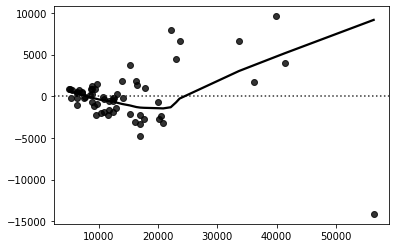

In [90]:
err_m1 = testy - p1
sns.residplot(p1,err_m1,lowess=True,color="black")

Parameters check MAE, MSE, RMSE

In [93]:
#MAE
m1_mae = metrics.mean_absolute_error(testy, p1)
print(m1_mae)

2125.8064754941565


In [94]:
#MSE
m1_mse = metrics.mean_squared_error(testy, p1)
print(m1_mse)

12648689.422462152


In [95]:
#RMSE
m1_rmse = np.sqrt(metrics.mean_squared_error(testy, p1))
print(m1_rmse)

3556.4996024830584


Decision Tree regression model

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from subprocess import check_call

In [97]:
regressor = DecisionTreeRegressor()
m2 = regressor.fit(trainx, trainy)
p2 = m2.predict(testx)

Parameters check MAE, MSE, RMSE

In [100]:
#MAE
m2_mae = metrics.mean_absolute_error(testy, p2)
print(m2_mae)

2347.0819672131147


In [98]:
#MSE
m2_mse = metrics.mean_squared_error(testy, p2)
print(m2_mse)

12332394.590163935


In [99]:
#RMSE
m2_rmse = np.sqrt(metrics.mean_squared_error(testy, p2))
print(m2_rmse)

3511.7509294031565


Random Forest regression model

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
m3= RandomForestRegressor().fit(trainx, trainy)
p3 = m3.predict(testx)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Parameters check MAE, MSE, RMSE

In [104]:
#MAE
m3_mae = metrics.mean_absolute_error(testy, p3)
print(m3_mae)

1971.6245901639343


In [103]:
#MSE
m3_mse = metrics.mean_squared_error(testy, p3)
print(m3_mse)

7804494.351967214


In [105]:
#RMSE
m3_rmse = np.sqrt(metrics.mean_squared_error(testy, p3))
print(m3_rmse)

2793.6525109553645


KNN regression model

In [106]:
from sklearn import neighbors

In [107]:
nn = list(range(3,16))
cv_scores =[]
for k in nn:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn,trainx,trainy,cv=5,scoring="neg_mean_squared_error")
    cv_scores.append(scores.mean())
    
opt_k= nn[cv_scores.index(max(cv_scores))]
print(opt_k)

3


Build the model using optimal k value

In [108]:
m4 = neighbors.KNeighborsRegressor(n_neighbors=opt_k).fit(trainx,trainy)
p4 = m4.predict(testx)

Parameters check MAE, MSE, RMSE

In [111]:
#MAE
m4_mae = metrics.mean_absolute_error(testy, p4)
print(m4_mae)

3287.0601092896172


In [109]:
#MSE
m4_mse = metrics.mean_squared_error(testy, p4)
print(m4_mse)

49593176.97996358


In [113]:
#RMSE
m4_rmse = np.sqrt(metrics.mean_squared_error(testy, p4))
print(m4_rmse)

7042.242326131896


Implement knn using minmax scaler

In [114]:
tranx_trans = trainx.copy()
testx_trans = testx.copy()

In [116]:
minmax = preprocessing.MinMaxScaler()
scaledvals = minmax.fit_transform(tranx_trans)
tranx_trans = scaledvals
scaledvals_test = minmax.fit_transform(testx_trans)
testx_trans = scaledvals_test

In [117]:
cv_scores1 =[]
for k in nn:
    knn1 = neighbors.KNeighborsRegressor(n_neighbors=k)
    scores1 = cross_val_score(knn1,tranx_trans,trainy,cv=5,scoring="neg_mean_squared_error")
    cv_scores1.append(scores1.mean())
    
opt_k1 = nn[cv_scores1.index(max(cv_scores1))]
print(opt_k1)

3


In [118]:
#build the model using optimal k
m5 = neighbors.KNeighborsRegressor(n_neighbors=opt_k1).fit(tranx_trans,trainy)
p5 = m5.predict(testx_trans)

Parameters check MAE, MSE, RMSE

In [120]:
#MAE
m5_mae = metrics.mean_absolute_error(testy, p5)
print(m5_mae)

2499.4535519125693


In [121]:
#MSE
m5_mse = metrics.mean_squared_error(testy, p5)
print(m5_mse)

23507443.755919855


In [123]:
#RMSE
m5_rmse = np.sqrt(metrics.mean_squared_error(testy, p5))
print(m5_rmse)

4848.447561428282


From these models we can say that, Random forest is good model as it has low MAE and low RMSE as compare to other models